In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregando arquivo
df_exam = pd.read_csv(r'./datasets/1698696961761-attachment.csv')

In [4]:
# Fazendo Dataframe
df_exam = pd.DataFrame(df_exam)

In [5]:
df_exam

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
...,...,...,...,...,...,...
95,96,F,52,96,183,89
96,97,F,68,108,169,105
97,98,M,21,95,154,125
98,99,M,41,109,173,128


In [6]:
# Dropando coluna de Identificação, ja que não será necessário para a analíse dos dados
df_exam.drop(columns=['id_paciente'], axis=1, inplace=True)

In [7]:
# Fazendo One hot encoding para converter variavel categorica em numerica
df_exam = pd.get_dummies(df_exam, columns=['genero'], dtype='int64')

In [9]:
# Verificando as mudanças
df_exam.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


- Onde a varivel for verdadeira, ele coloca o 1 como varivael numerica na coluna responsável

<Axes: >

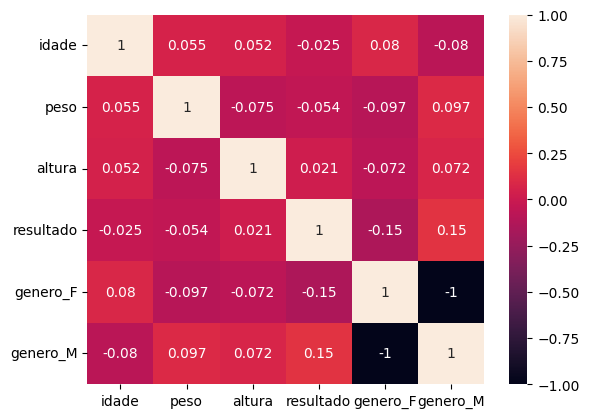

In [ ]:
# Como visualizar o Heat Map da correlação das variveis do exame
sns.heatmap(df_exam.corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

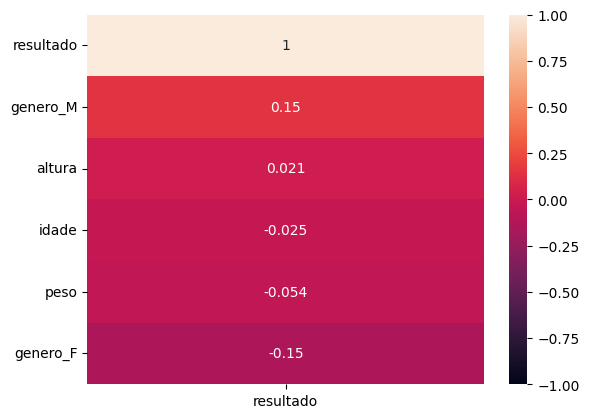

In [11]:
# Heat Map somente com a variavel target (Resultado) 
sns.heatmap(df_exam.corr()[['resultado']].sort_values(by='resultado', ascending=False), annot=True, vmin=-1, vmax=1)

##### Criando Feature

In [12]:
# Inlcuindo a feature de IMC
df_exam['imc'] = (df_exam['peso'] / ((df_exam['altura'] / 100) ** 2))

In [13]:
df_exam.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


<Axes: >

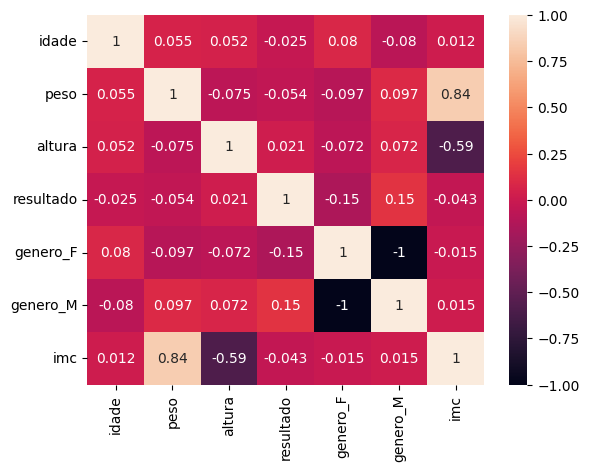

In [14]:
# Visualizando o Heat Map da correlação das variveis do exame, agora com o IMC
sns.heatmap(df_exam.corr(), annot=True, vmin=-1, vmax=1)

- Ainda assim o IMC não tem relação com o resultado

### Usando sckitlearn

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# Modelo 1 
x = df_exam.drop(columns=['imc', 'resultado'])
y = df_exam['resultado']

In [18]:
# Dividir conjunto entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=51)

- 70% dos dados está em x_train e y_train 
- os outros 30% dos dados está em x_test e y_test

In [19]:
# Treinar o algoritmo de regressão linear
model_1 = LinearRegression().fit(x_train, y_train)

In [23]:
# Gerando previsões do conjunto de testes do modelo 1
prev = model_1.predict(x_test)

In [24]:
# R1 Score no conjunto de treinamento 
model_1.score(x_train, y_train)

0.06218388634297267

In [25]:
# R1 Score no conjunto de testes
model_1.score(x_test, y_test)

-0.1364090447910642